In [7]:
import os, sys
import pickle
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import face_recognition
from utils import *

In [49]:
image_file = os.path.join(os.getcwd(), 'images/이진욱.jpg')
cropped_face = get_cropped_face(image_file)

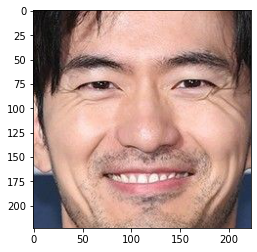

In [50]:
plt.imshow(cropped_face)

In [52]:
image_folder = os.path.join(os.getcwd(), 'celebrity')
# 전체 이미지 데이터 셋에 대하여 임베딩 벡터를 구하여 dictionry 형태로 담아둔다.
embedding_matrix = get_face_embedding_dict(image_folder)

In [53]:
# 타겟 이미지의 임베딩 벡터를 구한다.
target_vector = get_face_embedding(cropped_face)
# embedding_matrix에 넣어주기 위해 value로 numpy array type으로 바꿔준다.
target_vector = np.array(target_vector[0])

In [54]:
# embedding_matrix에 target image의 embedded vector를 추가한다.
embedding_matrix["이진욱"] = target_vector

In [55]:
# 피클로 저장한다.
with open("embedding_dict.pkl", "wb") as f:
    pickle.dump(embedding_matrix, f)

In [56]:
# 저장했던 파일을 불러온다.
with open("embedding_dict.pkl", "rb") as f:
    embedding_matrix = pickle.load(f)

In [57]:
# target 이미지와 가까운 이미지 순으로 30장을 뽑느다.
top_embedding_matrix = get_nearest_face('이진욱',top=30)

순위 0: 이름(이진욱), 거리(0.0)
순위 1: 이름(김광현), 거리(0.5030784946614022)
순위 2: 이름(기성용), 거리(0.5187495491747143)
순위 3: 이름(황병국), 거리(0.5254545445521258)
순위 4: 이름(노홍철), 거리(0.5269024407911566)
순위 5: 이름(이영하), 거리(0.5297812030478892)
순위 6: 이름(안재홍), 거리(0.5431796970288807)
순위 7: 이름(이대형), 거리(0.5441083683254418)
순위 8: 이름(노무현), 거리(0.5484584330029524)
순위 9: 이름(이진호), 거리(0.5487607908449501)
순위 10: 이름(박명수), 거리(0.5515750078137851)
순위 11: 이름(RM), 거리(0.551676739884515)
순위 12: 이름(송중기), 거리(0.5529918141677931)
순위 13: 이름(목진화), 거리(0.553809329343267)
순위 14: 이름(장성호), 거리(0.5550843135456343)
순위 15: 이름(김민재), 거리(0.5606978722914095)
순위 16: 이름(문재인), 거리(0.5645713376726158)
순위 17: 이름(서강준), 거리(0.565740227429104)
순위 18: 이름(정국), 거리(0.5670490733612553)
순위 19: 이름(디오), 거리(0.5689826624694065)
순위 20: 이름(이승철), 거리(0.5692397444024799)
순위 21: 이름(무라니시), 거리(0.5706010666696116)
순위 22: 이름(방시혁), 거리(0.5709389579514343)
순위 23: 이름(수호), 거리(0.5715359851189925)
순위 24: 이름(김래원), 거리(0.5717300367389037)
순위 25: 이름(하현우), 거리(0.5735745243018245)
순위 26: 이름(이민호), 거

In [58]:
names = list(top_embedding_matrix.keys())

In [59]:
top_list = np.array(list(map(list, list(top_embedding_matrix.values()))))

In [60]:
# 얼굴영역이 크롭된 이미지가 128차원의 벡터로 바뀌어있다.
np.shape(top_list)

(31, 128)

### Top인물 시각화

In [61]:
from sklearn.decomposition import PCA
# 2차원으로 차원압축을 한다.
n_dimension = 2
pca = PCA(n_components=n_dimension)
pca_results = pca.fit_transform(top_list)

In [62]:
# PCA로 임베딩메트릭스의 차원을 2차원으로 축소 시킨다.
print("pca_results의 shape: {}".format(pca_results.shape))

pca_results의 shape: (31, 2)


In [63]:
#인물별 PCA 값을 dataframe으로 만들어준다.
df_tops = {'names': names,
          'x' : pca_results[:,0],
          'y' : pca_results[:,1]}
df_tops = pd.DataFrame(df_tops)

In [64]:
df_tops.head(5)

,names,x,y
0,이진욱,0.037014,0.018833
1,김광현,0.102808,0.135973
2,기성용,0.076034,0.171808
3,황병국,0.143233,0.053950
4,노홍철,0.119055,-0.027407


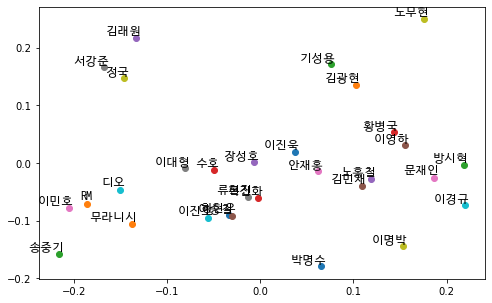

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 한글폰트 생성
font_path = os.getenv('HOME')+'/.local/share/fonts/D2Coding/D2Coding-Ver1.3.2-20180524.ttf'
fontprop = fm.FontProperties(fname=font_path, size=12)

plt.figure(figsize=(8,5))
for i, label in enumerate(df_tops["names"][:]):
    if len(df_tops["names"][i])==1:
        continue
    x= df_tops["x"][i] 
    y = df_tops["y"][i] 
    plt.scatter(x, y)
    plt.annotate(label,xy=(x, y), xytext=(5, 2), 
                 textcoords='offset points', 
                 ha='right', va='bottom',
                 fontproperties=fontprop)   # 한글폰트 적용)
plt.show()

### 얼굴을 plot 시켜보자

In [66]:
file_list = glob('celebrity/*')

In [67]:
name=[]
for na in names:
    for fl in file_list:
        if na in fl:
            name.append(fl)

In [68]:
import cv2 as cv
from tqdm import tqdm

# 얼굴사진을 작게 리사이즈하여 리스트에 담아둔다.=> 나중에 plot할때 사용하기 위함
cropped_faces = []
for i in tqdm(range(len(name))):
    cropped_face = get_cropped_face(os.path.join(os.getcwd(), name[i]))
    cropped_face = cv.resize(cropped_face, dsize=(32, 32), interpolation=cv.INTER_AREA)
    cropped_faces.append(cropped_face)

100%|██████████| 47/47 [00:06<00:00,  7.28it/s]


In [69]:
from time import time
from matplotlib import offsetbox
from sklearn import manifold, datasets, decomposition, ensemble,discriminant_analysis, random_projection, neighbors

In [88]:
# Scale and visualize the embedding vectors
def plot_embedding(X, number=276, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(50.,50.))
    ax = plt.subplot(539)

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[50., 50.]])  # just something big
        for i in range(number):
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(cropped_faces[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    # plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

Computing PCA embedding


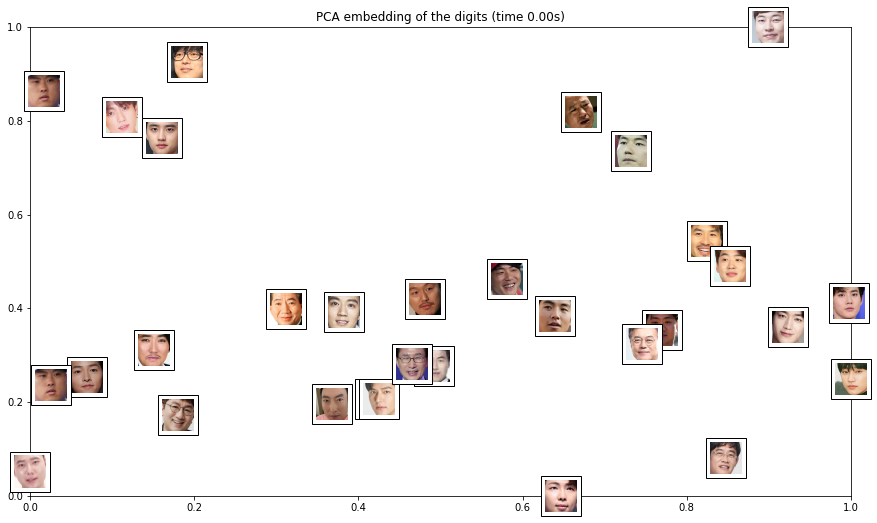

In [91]:
print("Computing PCA embedding")
t0 = time()
X_pca = pca_results
num = len(X_pca)
plot_embedding(X_pca, number=num, title="PCA embedding of the digits (time %.2fs)" %
               (time() - t0))